In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import sklearn.metrics as sm
%matplotlib inline

In [2]:
SO_Dataset = pd.read_csv('Edited Dataset_copy.csv')

In [3]:
SO_Dataset

Id                                               Tags  Score  \
0     1935115                    <android><nullpointerexception>      0   
1     1887758                                   <android><flash>      6   
2     1266145  <localization><passwords><windows-xp><right-to...      6   
3     1197888             <asp.net><security><connection-string>      2   
4      963535                        <java><jsf><seam><facelets>      0   
...       ...                                                ...    ...   
6142  4620621                         <java><jboss><jboss-4.2.x>      4   
6143  7584656                                    <c#><.net><wcf>      2   
6144  5647261                                      <c#><timeout>      2   
6145  4829818         <iphone><cocoa-touch><caching><webrequest>      0   
6146  6019004               <mysql><ruby-on-rails><activerecord>      1   

          CreationDate  ViewCount  AnswerCount  CommentCount  FavoriteCount  \
0      12/20/2009 7:25        121            1             2            NaN   
1     12/11/2009 12:27      23111            4             1            4.0   
2      8/12/2009 13:25        204            2             1            1.0   
3       7/29/2009 3:15        186            3             0            0.0   
4        6/8/2009 5:37        559            3             1            1.0   
...                ...        ...          ...           ...            ...   
6142    1/6/2011 22:25        723            1             1            NaN   
6143   9/28/2011 14:15        441            1             0            NaN   
6144    4/13/2011 9:46       2573            4             0            NaN   
6145   1/28/2011 15:19        349            2             0            1.0   
6146   5/16/2011 14:38        413            0             2            NaN   

      AskerId  Reputation  TagCount  TitleLength Technology AorN  
0     2355649       30429         2            6    android    N  
1     2355649       30429         2            6    android    N  
2        1898       62916         4            4        NaN    N  
3        1899        2561         3           11    asp.net    N  
4        1900        7881         4            7       java    N  
...       ...         ...       ...          ...        ...  ...  
6142     6508       87411         3           11       java    N  
6143     6508       87411         3            8         c#    N  
6144     6508       87411         2           10         c#    N  
6145     4172       77972         4            6        NaN    N  
6146     4174       11336         3            6      mysql    N  

[6147 rows x 14 columns]

In [4]:
SO_Dataset.describe()

Id        Score     ViewCount  AnswerCount  CommentCount  \
count  6.147000e+03  6147.000000  6.147000e+03  6147.000000   6147.000000   
mean   2.744016e+06     6.460875  5.731716e+03     2.659671      1.171140   
std    2.304157e+06    36.285404  2.911060e+04     2.700895      1.939282   
min    4.065340e+05    -6.000000  3.100000e+01     0.000000      0.000000   
25%    8.946440e+05     1.000000  4.440000e+02     1.000000      0.000000   
50%    1.750338e+06     2.000000  1.222000e+03     2.000000      0.000000   
75%    4.152266e+06     5.000000  3.400500e+03     3.000000      2.000000   
max    8.688475e+06  2084.000000  1.122933e+06    55.000000     23.000000   

       FavoriteCount       AskerId     Reputation     TagCount  TitleLength  
count    2918.000000  6.147000e+03    6147.000000  6147.000000  6147.000000  
mean        6.099726  7.298248e+03   42715.146250     2.956727     8.963885  
std        58.845369  9.036152e+04   61069.803313     1.126876     3.694923  
min         0.000000  5.000000e+00       1.000000     1.000000     1.000000  
25%         1.000000  1.190000e+03    6735.000000     2.000000     6.000000  
50%         2.000000  2.536000e+03   21047.000000     3.000000     9.000000  
75%         3.000000  5.416000e+03   53820.000000     4.000000    11.000000  
max      1728.000000  2.449068e+06  806159.000000     5.000000    26.000000

In [5]:
SO_Dataset.isnull()

Id   Tags  Score  CreationDate  ViewCount  AnswerCount  CommentCount  \
0     False  False  False         False      False        False         False   
1     False  False  False         False      False        False         False   
2     False  False  False         False      False        False         False   
3     False  False  False         False      False        False         False   
4     False  False  False         False      False        False         False   
...     ...    ...    ...           ...        ...          ...           ...   
6142  False  False  False         False      False        False         False   
6143  False  False  False         False      False        False         False   
6144  False  False  False         False      False        False         False   
6145  False  False  False         False      False        False         False   
6146  False  False  False         False      False        False         False   

      FavoriteCount  AskerId  Reputation  TagCount  TitleLength  Technology  \
0              True    False       False     False        False       False   
1             False    False       False     False        False       False   
2             False    False       False     False        False        True   
3             False    False       False     False        False       False   
4             False    False       False     False        False       False   
...             ...      ...         ...       ...          ...         ...   
6142           True    False       False     False        False       False   
6143           True    False       False     False        False       False   
6144           True    False       False     False        False       False   
6145          False    False       False     False        False        True   
6146           True    False       False     False        False       False   

       AorN  
0     False  
1     False  
2     False  
3     False  
4     False  
...     ...  
6142  False  
6143  False  
6144  False  
6145  False  
6146  False  

[6147 rows x 14 columns]

In [6]:
SO_Dataset.isnull().sum()

Id                  0
Tags                0
Score               0
CreationDate        0
ViewCount           0
AnswerCount         0
CommentCount        0
FavoriteCount    3229
AskerId             0
Reputation          0
TagCount            0
TitleLength         0
Technology       2416
AorN                0
dtype: int64

In [7]:
SO_Dataset[SO_Dataset['FavoriteCount'].isnull()]

Id                                               Tags  Score  \
0     1935115                    <android><nullpointerexception>      0   
5      654565                              <xml><xslt><xslt-1.0>      0   
6     1142067  <javascript><sharepoint><cross-browser><user-a...      0   
7     1611471  <sharepoint><sharepoint-2007><moss><wss><share...      0   
8     1716113  <sharepoint><sharepoint-2007><sharepoint-desig...      2   
...       ...                                                ...    ...   
6138  5665302                                 <wpf><wpfdatagrid>      2   
6142  4620621                         <java><jboss><jboss-4.2.x>      4   
6143  7584656                                    <c#><.net><wcf>      2   
6144  5647261                                      <c#><timeout>      2   
6146  6019004               <mysql><ruby-on-rails><activerecord>      1   

          CreationDate  ViewCount  AnswerCount  CommentCount  FavoriteCount  \
0      12/20/2009 7:25        121            1             2            NaN   
5      3/17/2009 14:50       2600            2             1            NaN   
6       7/17/2009 8:43        567            1             0            NaN   
7      10/23/2009 5:05       1398            2             0            NaN   
8     11/11/2009 15:54       4172            1             0            NaN   
...                ...        ...          ...           ...            ...   
6138   4/14/2011 15:05       2639            1             0            NaN   
6142    1/6/2011 22:25        723            1             1            NaN   
6143   9/28/2011 14:15        441            1             0            NaN   
6144    4/13/2011 9:46       2573            4             0            NaN   
6146   5/16/2011 14:38        413            0             2            NaN   

      AskerId  Reputation  TagCount  TitleLength  Technology AorN  
0     2355649       30429         2            6     android    N  
5        1900        7881         3            8         xml    N  
6        1909       13571         4            5  javascript    N  
7        1909       13571         5            5  sharepoint    N  
8        1909       13571         4           13  sharepoint    N  
...       ...         ...       ...          ...         ...  ...  
6138     6486       14492         2           12         NaN    N  
6142     6508       87411         3           11        java    N  
6143     6508       87411         3            8          c#    N  
6144     6508       87411         2           10          c#    N  
6146     4174       11336         3            6       mysql    N  

[3229 rows x 14 columns]

In [8]:
SO_Dataset = SO_Dataset.fillna(SO_Dataset.mean())

In [9]:
SO_Dataset

Id                                               Tags  Score  \
0     1935115                    <android><nullpointerexception>      0   
1     1887758                                   <android><flash>      6   
2     1266145  <localization><passwords><windows-xp><right-to...      6   
3     1197888             <asp.net><security><connection-string>      2   
4      963535                        <java><jsf><seam><facelets>      0   
...       ...                                                ...    ...   
6142  4620621                         <java><jboss><jboss-4.2.x>      4   
6143  7584656                                    <c#><.net><wcf>      2   
6144  5647261                                      <c#><timeout>      2   
6145  4829818         <iphone><cocoa-touch><caching><webrequest>      0   
6146  6019004               <mysql><ruby-on-rails><activerecord>      1   

          CreationDate  ViewCount  AnswerCount  CommentCount  FavoriteCount  \
0      12/20/2009 7:25        121            1             2       6.099726   
1     12/11/2009 12:27      23111            4             1       4.000000   
2      8/12/2009 13:25        204            2             1       1.000000   
3       7/29/2009 3:15        186            3             0       0.000000   
4        6/8/2009 5:37        559            3             1       1.000000   
...                ...        ...          ...           ...            ...   
6142    1/6/2011 22:25        723            1             1       6.099726   
6143   9/28/2011 14:15        441            1             0       6.099726   
6144    4/13/2011 9:46       2573            4             0       6.099726   
6145   1/28/2011 15:19        349            2             0       1.000000   
6146   5/16/2011 14:38        413            0             2       6.099726   

      AskerId  Reputation  TagCount  TitleLength Technology AorN  
0     2355649       30429         2            6    android    N  
1     2355649       30429         2            6    android    N  
2        1898       62916         4            4        NaN    N  
3        1899        2561         3           11    asp.net    N  
4        1900        7881         4            7       java    N  
...       ...         ...       ...          ...        ...  ...  
6142     6508       87411         3           11       java    N  
6143     6508       87411         3            8         c#    N  
6144     6508       87411         2           10         c#    N  
6145     4172       77972         4            6        NaN    N  
6146     4174       11336         3            6      mysql    N  

[6147 rows x 14 columns]

In [10]:
SO_Dataset.isnull().sum()

Id                  0
Tags                0
Score               0
CreationDate        0
ViewCount           0
AnswerCount         0
CommentCount        0
FavoriteCount       0
AskerId             0
Reputation          0
TagCount            0
TitleLength         0
Technology       2416
AorN                0
dtype: int64

In [11]:
New_SO_Dataset = SO_Dataset.fillna({
    'Technology' : "No Related Technology"
})

In [12]:
New_SO_Dataset

Id                                               Tags  Score  \
0     1935115                    <android><nullpointerexception>      0   
1     1887758                                   <android><flash>      6   
2     1266145  <localization><passwords><windows-xp><right-to...      6   
3     1197888             <asp.net><security><connection-string>      2   
4      963535                        <java><jsf><seam><facelets>      0   
...       ...                                                ...    ...   
6142  4620621                         <java><jboss><jboss-4.2.x>      4   
6143  7584656                                    <c#><.net><wcf>      2   
6144  5647261                                      <c#><timeout>      2   
6145  4829818         <iphone><cocoa-touch><caching><webrequest>      0   
6146  6019004               <mysql><ruby-on-rails><activerecord>      1   

          CreationDate  ViewCount  AnswerCount  CommentCount  FavoriteCount  \
0      12/20/2009 7:25        121            1             2       6.099726   
1     12/11/2009 12:27      23111            4             1       4.000000   
2      8/12/2009 13:25        204            2             1       1.000000   
3       7/29/2009 3:15        186            3             0       0.000000   
4        6/8/2009 5:37        559            3             1       1.000000   
...                ...        ...          ...           ...            ...   
6142    1/6/2011 22:25        723            1             1       6.099726   
6143   9/28/2011 14:15        441            1             0       6.099726   
6144    4/13/2011 9:46       2573            4             0       6.099726   
6145   1/28/2011 15:19        349            2             0       1.000000   
6146   5/16/2011 14:38        413            0             2       6.099726   

      AskerId  Reputation  TagCount  TitleLength             Technology AorN  
0     2355649       30429         2            6                android    N  
1     2355649       30429         2            6                android    N  
2        1898       62916         4            4  No Related Technology    N  
3        1899        2561         3           11                asp.net    N  
4        1900        7881         4            7                   java    N  
...       ...         ...       ...          ...                    ...  ...  
6142     6508       87411         3           11                   java    N  
6143     6508       87411         3            8                     c#    N  
6144     6508       87411         2           10                     c#    N  
6145     4172       77972         4            6  No Related Technology    N  
6146     4174       11336         3            6                  mysql    N  

[6147 rows x 14 columns]

In [13]:
New_SO_Dataset.isnull().sum()

Id               0
Tags             0
Score            0
CreationDate     0
ViewCount        0
AnswerCount      0
CommentCount     0
FavoriteCount    0
AskerId          0
Reputation       0
TagCount         0
TitleLength      0
Technology       0
AorN             0
dtype: int64

In [14]:
New_SO_Dataset.Technology.value_counts()

No Related Technology    2416
c#                        716
java                      433
.net                      396
javascript                259
asp.net                   221
c++                       198
python                    167
php                       150
ruby-on-rails             113
asp.net-mvc               113
sharepoint                108
sql                        87
html                       85
jquery                     77
windows                    67
mysql                      54
nhibernate                 49
ruby                       49
android                    48
css                        42
ios                        41
c                          38
cocoa                      29
linux                      28
xml                        28
oracle                     27
oop                        18
ajax                       16
perl                       15
tomcat                     15
regex                      13
hibernate                  12
asp.net-aj

In [15]:
type(New_SO_Dataset),New_SO_Dataset.shape

(pandas.core.frame.DataFrame, (6147, 14))

In [16]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
dataTransform = New_SO_Dataset.copy()

In [17]:
for data in New_SO_Dataset.columns:
    dataTransform[data] = labelEncoder.fit_transform(dataTransform[data])

In [18]:
dataTransform

Id  Tags  Score  CreationDate  ViewCount  AnswerCount  CommentCount  \
0     1654   337      5          1190         75            1             2   
1     1625   330     11          1080       2651            4             1   
2     1155  2598     11          3828        156            2             1   
3     1103   585      7          3679        138            3             0   
4      873  2161      5          3374        482            3             1   
...    ...   ...    ...           ...        ...          ...           ...   
6142  3126  2147      9           377        615            1             1   
6143  4148   768      7          4371        376            1             0   
6144  3536  1042      7          2252       1571            4             0   
6145  3224  1914      5           284        293            2             0   
6146  3671  2724      6          2702        351            0             2   

      FavoriteCount  AskerId  Reputation  TagCount  TitleLength  Technology  \
0                 7     1343        1105         1            5           3   
1                 4     1343        1105         1            5           3   
2                 1      437        1280         3            3           1   
3                 0      438         272         2           10           4   
4                 1      439         640         3            6          15   
...             ...      ...         ...       ...          ...         ...   
6142              7     1103        1323         2           10          15   
6143              7     1103        1323         2            7           8   
6144              7     1103        1323         1            9           8   
6145              1      778        1316         3            5           1   
6146              7      779         771         2            5          21   

      AorN  
0        0  
1        0  
2        0  
3        0  
4        0  
...    ...  
6142     0  
6143     0  
6144     0  
6145     0  
6146     0  

[6147 rows x 14 columns]

In [19]:
#from sklearn import preprocessing as per
#Rescaling
#scaler = per.MinMaxScaler(feature_range = (0,1))
#rescaleData = scaler.fit_transform(dataTransform)
#rescaleData = pd.DataFrame(rescaleData,index = dataTransform.index,columns = dataTransform.columns)

In [20]:
X = dataTransform.drop(['Id','Tags','AorN'],axis=1)

In [21]:
X

Score  CreationDate  ViewCount  AnswerCount  CommentCount  \
0         5          1190         75            1             2   
1        11          1080       2651            4             1   
2        11          3828        156            2             1   
3         7          3679        138            3             0   
4         5          3374        482            3             1   
...     ...           ...        ...          ...           ...   
6142      9           377        615            1             1   
6143      7          4371        376            1             0   
6144      7          2252       1571            4             0   
6145      5           284        293            2             0   
6146      6          2702        351            0             2   

      FavoriteCount  AskerId  Reputation  TagCount  TitleLength  Technology  
0                 7     1343        1105         1            5           3  
1                 4     1343        1105         1            5           3  
2                 1      437        1280         3            3           1  
3                 0      438         272         2           10           4  
4                 1      439         640         3            6          15  
...             ...      ...         ...       ...          ...         ...  
6142              7     1103        1323         2           10          15  
6143              7     1103        1323         2            7           8  
6144              7     1103        1323         1            9           8  
6145              1      778        1316         3            5           1  
6146              7      779         771         2            5          21  

[6147 rows x 11 columns]

In [22]:
Unanswered_Questions_Feature_List = list(X.columns)

In [23]:
Unanswered_Questions_Feature_List

['Score',
 'CreationDate',
 'ViewCount',
 'AnswerCount',
 'CommentCount',
 'FavoriteCount',
 'AskerId',
 'Reputation',
 'TagCount',
 'TitleLength',
 'Technology']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test = train_test_split(X,test_size=0.2,random_state = 41)

In [26]:
X_train

Score  CreationDate  ViewCount  AnswerCount  CommentCount  \
5319      8          1093       1631            1             0   
1799      6          2380         80            2             0   
532       5          3372       1223            3             0   
6042     10          3800        428            2             0   
1714      8          2565       1434            1             0   
...     ...           ...        ...          ...           ...   
5200     10          2404        954            1             0   
4066     14          1161        853            3             8   
3980      9          2296        679            1             1   
931       7          2536        873            4             2   
1984      7          1408       1828            4             0   

      FavoriteCount  AskerId  Reputation  TagCount  TitleLength  Technology  
5319              1     1119         502         4           12           1  
1799              7      476         992         1           14          16  
532               0      861         293         2            7           1  
6042              1     1091         845         1            5           1  
1714              7      447        1290         2           10          22  
...             ...      ...         ...       ...          ...         ...  
5200              7      791        1041         3            6          30  
4066              1      233         631         2            2           1  
3980              1      490        1381         3            9          27  
931               1      338        1287         1            2           1  
1984              7      289        1155         0           10           1  

[4917 rows x 11 columns]

In [27]:
X_train.shape

(4917, 11)

In [28]:
X_test

Score  CreationDate  ViewCount  AnswerCount  CommentCount  \
5821      6           360        446            6             0   
5561      8           762       1085            2             1   
819       8          1329       1595            2             2   
1364      6          3772        563            1             0   
1775      7           937        352            1             0   
...     ...           ...        ...          ...           ...   
927       5          2130         22            1             0   
3649      6           494        883            1             0   
3917      5          3270        931            1             6   
1192      3          2677       1755            6             2   
1908      5          1737        296            7             2   

      FavoriteCount  AskerId  Reputation  TagCount  TitleLength  Technology  
5821              7      686        1102         2           13           8  
5561              1      645         991         3            5          29  
819               2     1065        1069         2            2           9  
1364              1      367        1267         2            9          17  
1775              1      467        1086         1           10           1  
...             ...      ...         ...       ...          ...         ...  
927               7      338        1287         1            6           1  
3649              7      778        1316         2            7           1  
3917              7      164         637         2            9           0  
1192              7     1289        1092         2           10           9  
1908              1      507        1279         2            4           1  

[1230 rows x 11 columns]

In [29]:
pd.DataFrame(X_train).to_csv("x_train.csv")

In [30]:
Train_Data_set = pd.read_csv('x_train.csv')

In [31]:
pd.DataFrame(X_test).to_csv("x_test.csv")

In [32]:
Test_Data_set = pd.read_csv('x_test.csv')

In [33]:
train_row = make_blobs(n_samples = 4917, n_features = 11, centers = 2, cluster_std = 1.8)

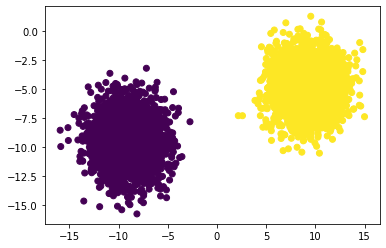

In [34]:
plt.scatter(train_row[0][:,0], train_row[0][:,1], c=train_row[1])

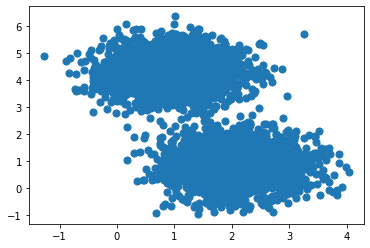

In [35]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=4917, centers=2,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

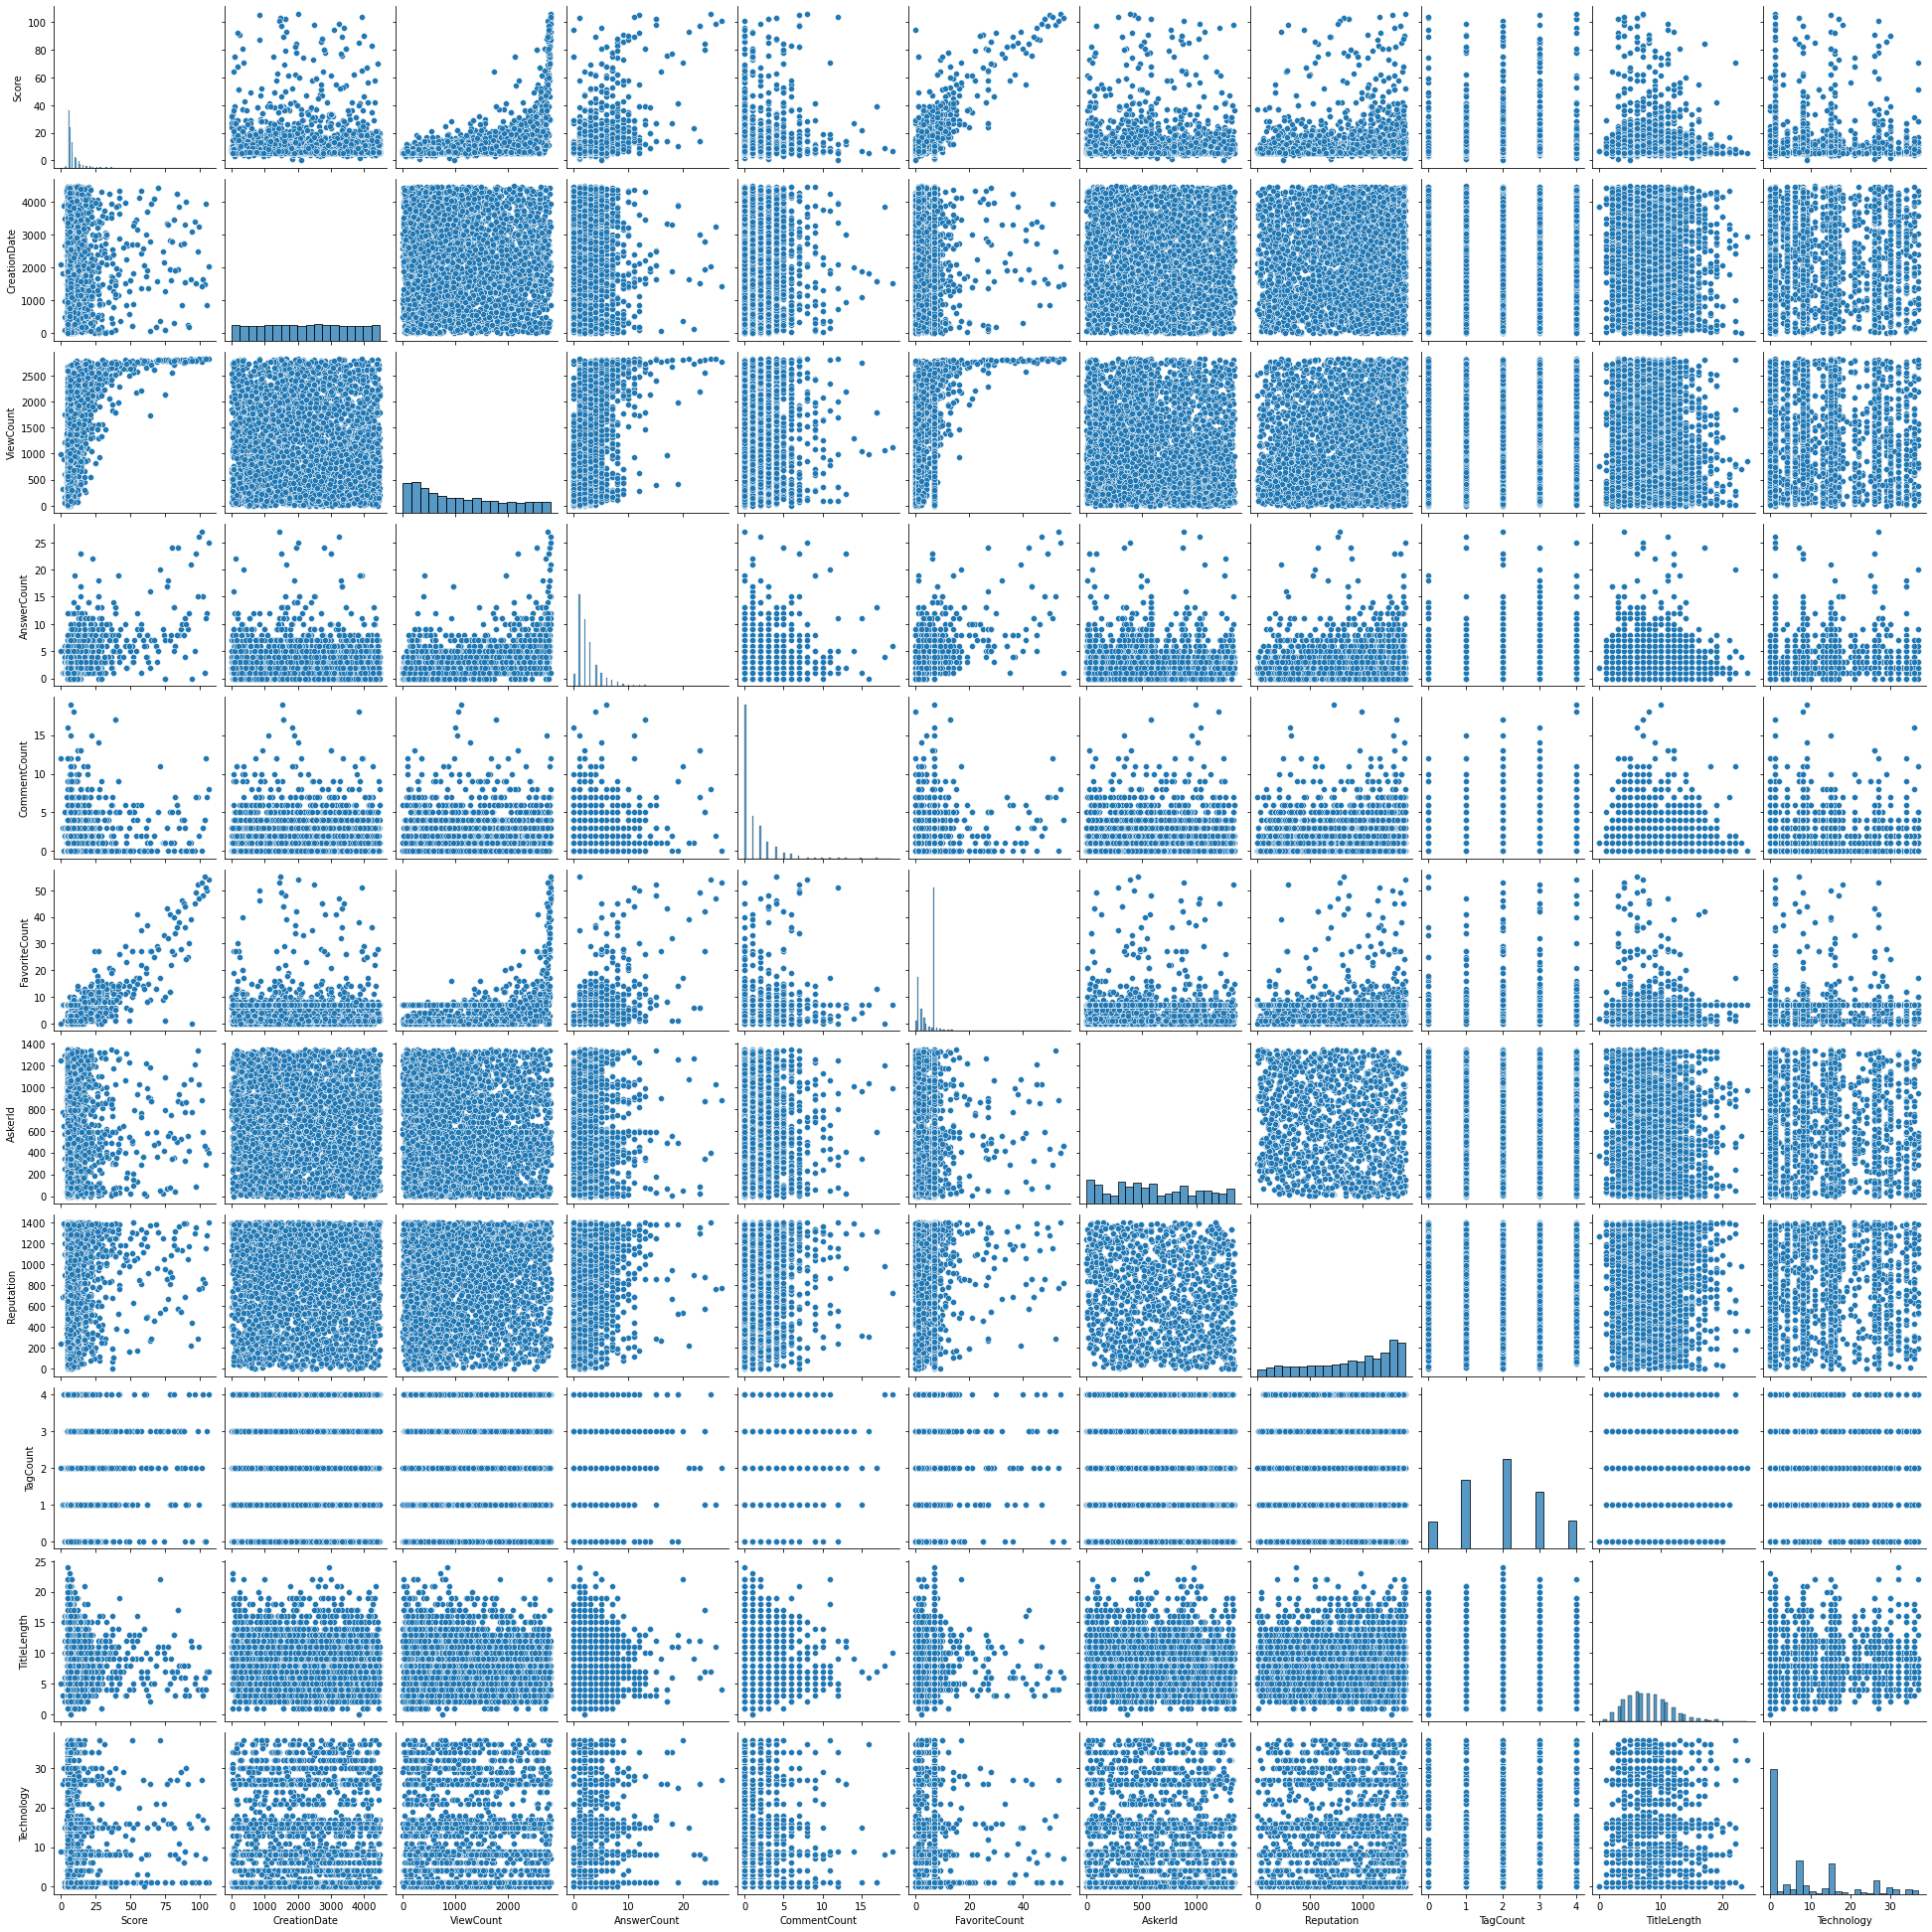

In [36]:
 import seaborn as sns
sns.pairplot(X_train[['Score','CreationDate','ViewCount','AnswerCount','CommentCount','FavoriteCount','AskerId','Reputation',
 'TagCount','TitleLength','Technology']])

In [37]:
import plotly.express as px
fig = px.scatter_matrix(X_train,
width=1200, height=1600)
fig.show()

In [38]:
# Run local implementation of kmeans
km = KMeans(n_clusters=2, max_iter=100)
km = km.fit(X_train)
centroids = km.cluster_centers_

In [39]:
#how many observations are in each cluster
print(km.labels_)
result=km.labels_
result=pd.DataFrame(result,columns=['cluster'])
result.groupby("cluster").size()

[0 1 1 ... 1 1 0]


cluster
0    2434
1    2483
dtype: int64

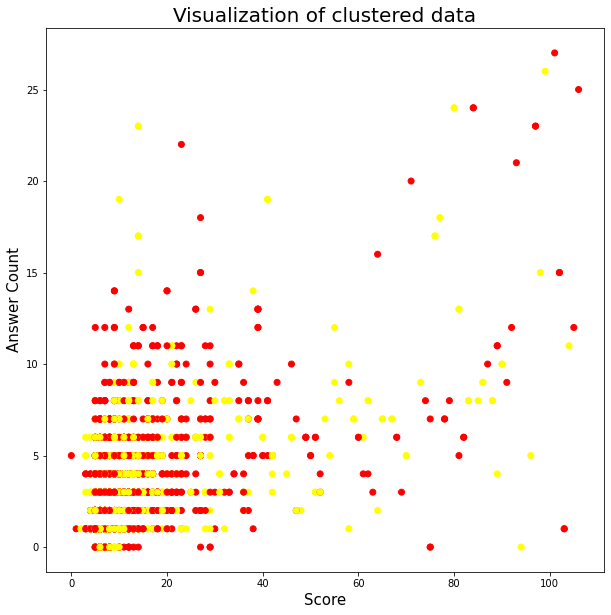

In [40]:
#Plot the clustered data 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Score', fontsize = 15)
ax.set_ylabel('Answer Count', fontsize = 15)
ax.set_title('Visualization of clustered data', fontsize = 20)
color_theme = np.array(["red","yellow"])  

ax.scatter(x = X_train.iloc[:,0], y = X_train.iloc[:,3], color = color_theme[result.cluster], label = 'cluster 1')

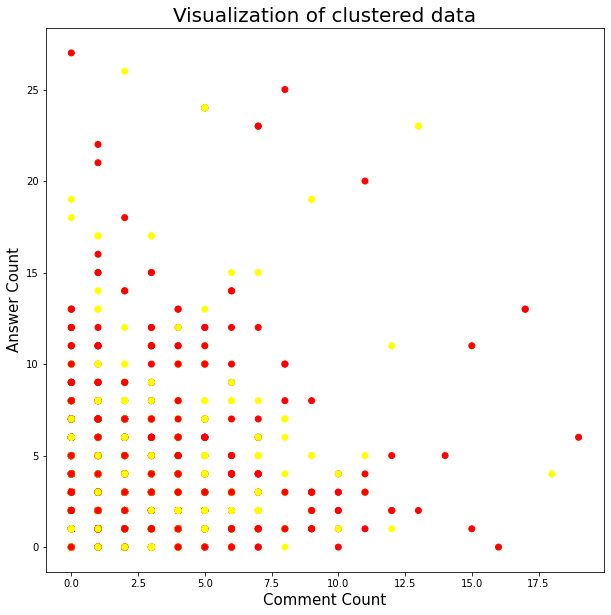

In [41]:
#Plot the clustered data 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Comment Count', fontsize = 15)
ax.set_ylabel('Answer Count', fontsize = 15)
ax.set_title('Visualization of clustered data', fontsize = 20)
color_theme = np.array(["red","yellow"])  

ax.scatter(x = X_train.iloc[:,4], y = X_train.iloc[:,3], color = color_theme[result.cluster], label = 'cluster 1')

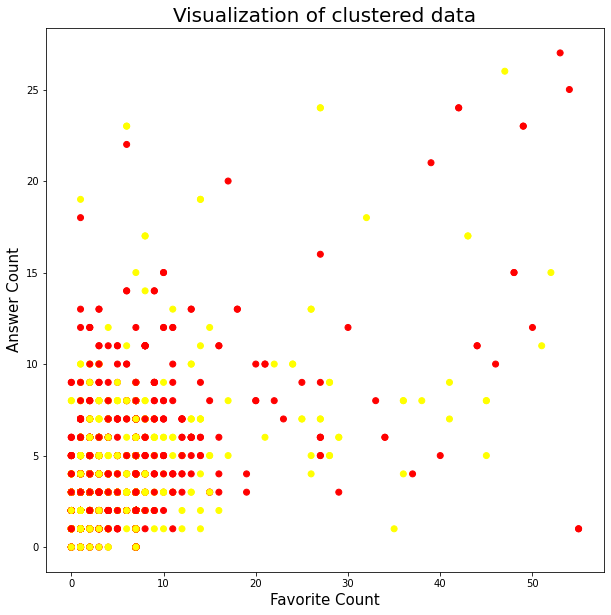

In [42]:
#Plot the clustered data 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Favorite Count', fontsize = 15)
ax.set_ylabel('Answer Count', fontsize = 15)
ax.set_title('Visualization of clustered data', fontsize = 20)
color_theme = np.array(["red","yellow"])  

ax.scatter(x = X_train.iloc[:,5], y = X_train.iloc[:,3], color = color_theme[result.cluster], label = 'cluster 1')

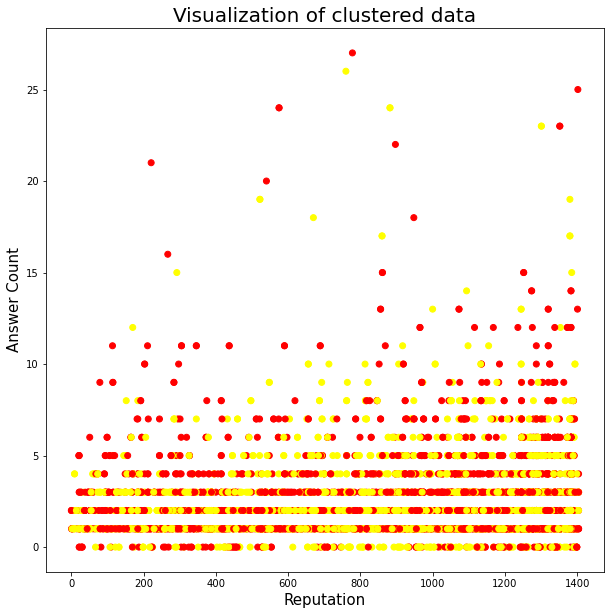

In [43]:
#Plot the clustered data 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Reputation', fontsize = 15)
ax.set_ylabel('Answer Count', fontsize = 15)
ax.set_title('Visualization of clustered data', fontsize = 20)
color_theme = np.array(["red","yellow"])  

ax.scatter(x = X_train.iloc[:,7], y = X_train.iloc[:,3], color = color_theme[result.cluster], label = 'cluster 1')

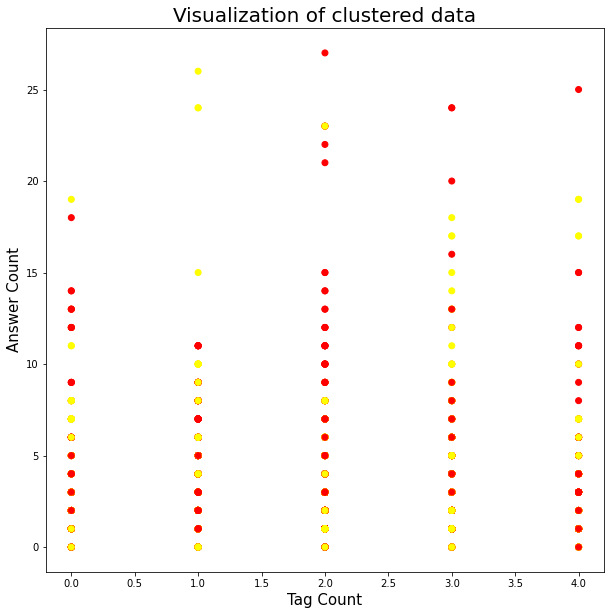

In [44]:
#Plot the clustered data 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Tag Count', fontsize = 15)
ax.set_ylabel('Answer Count', fontsize = 15)
ax.set_title('Visualization of clustered data', fontsize = 20)
color_theme = np.array(["red","yellow"])  

ax.scatter(x = X_train.iloc[:,8], y = X_train.iloc[:,3], color = color_theme[result.cluster], label = 'cluster 1')

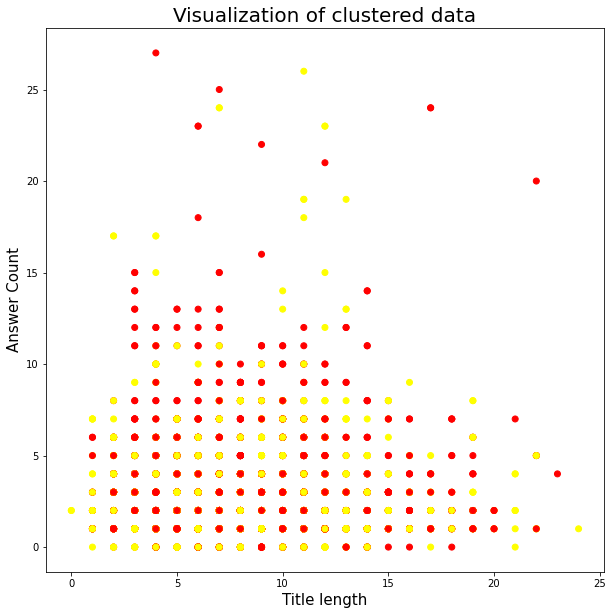

In [45]:
#Plot the clustered data 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Title length', fontsize = 15)
ax.set_ylabel('Answer Count', fontsize = 15)
ax.set_title('Visualization of clustered data', fontsize = 20)
color_theme = np.array(["red","yellow"])  

ax.scatter(x = X_train.iloc[:,9], y = X_train.iloc[:,3], color = color_theme[result.cluster], label = 'cluster 1')

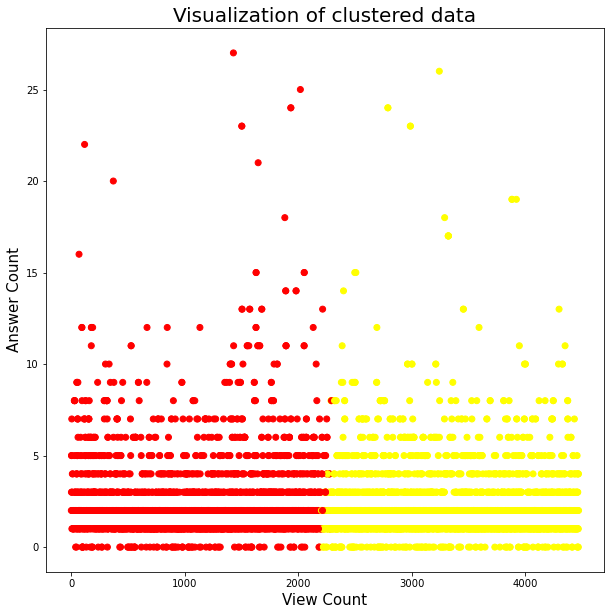

In [46]:
#Plot the clustered data 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('View Count', fontsize = 15)
ax.set_ylabel('Answer Count', fontsize = 15)
ax.set_title('Visualization of clustered data', fontsize = 20)
color_theme = np.array(["red","yellow"])  

ax.scatter(x = X_train.iloc[:,1], y = X_train.iloc[:,3], color = color_theme[result.cluster], label = 'cluster 1')


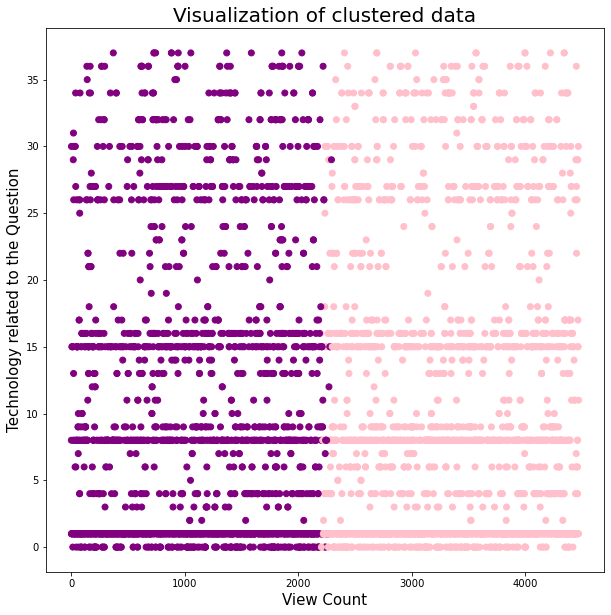

In [47]:
#Plot the clustered data 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('View Count', fontsize = 15)
ax.set_ylabel('Technology related to the Question', fontsize = 15)
ax.set_title('Visualization of clustered data', fontsize = 20)
color_theme = np.array(["purple","pink"])  

ax.scatter(x = X_train.iloc[:,1], y = X_train.iloc[:,10], color = color_theme[result.cluster], label = 'cluster 1')

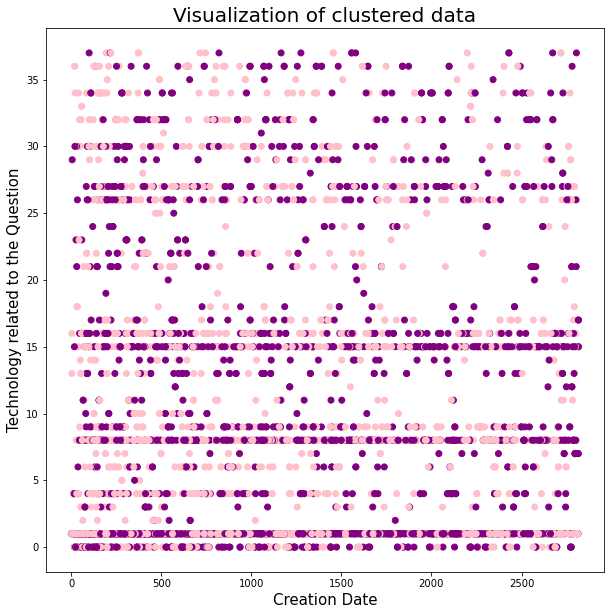

In [48]:
#Plot the clustered data 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Creation Date', fontsize = 15)
ax.set_ylabel('Technology related to the Question', fontsize = 15)
ax.set_title('Visualization of clustered data', fontsize = 20)
color_theme = np.array(["purple","pink"])  

ax.scatter(x = X_train.iloc[:,2], y = X_train.iloc[:,10], color = color_theme[result.cluster], label = 'cluster 1')

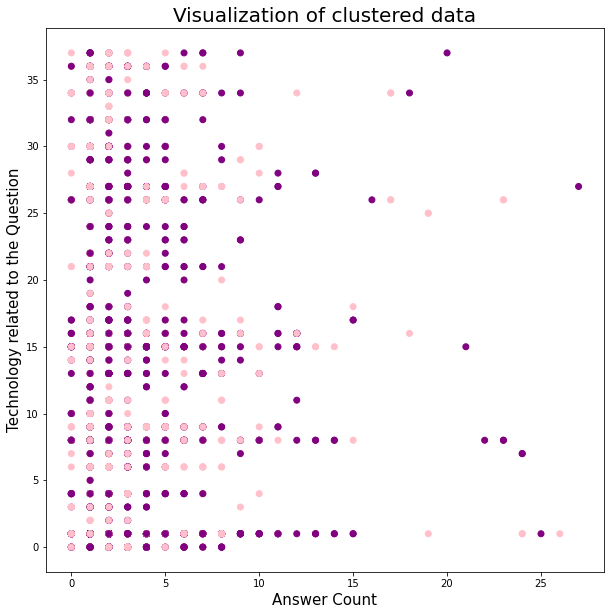

In [49]:
#Plot the clustered data 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Answer Count', fontsize = 15)
ax.set_ylabel('Technology related to the Question', fontsize = 15)
ax.set_title('Visualization of clustered data', fontsize = 20)
color_theme = np.array(["purple","pink"])  

ax.scatter(x = X_train.iloc[:,3], y = X_train.iloc[:,10], color = color_theme[result.cluster], label = 'cluster 1')

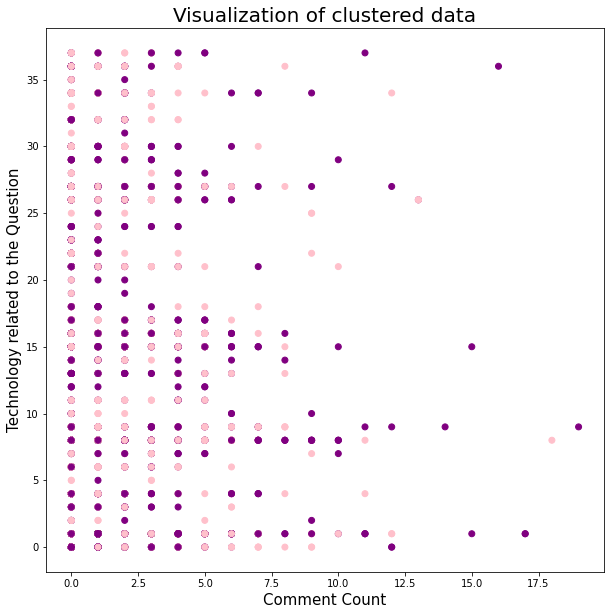

In [50]:
#Plot the clustered data 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Comment Count', fontsize = 15)
ax.set_ylabel('Technology related to the Question', fontsize = 15)
ax.set_title('Visualization of clustered data', fontsize = 20)
color_theme = np.array(["purple","pink"])  

ax.scatter(x = X_train.iloc[:,4], y = X_train.iloc[:,10], color = color_theme[result.cluster], label = 'cluster 1')

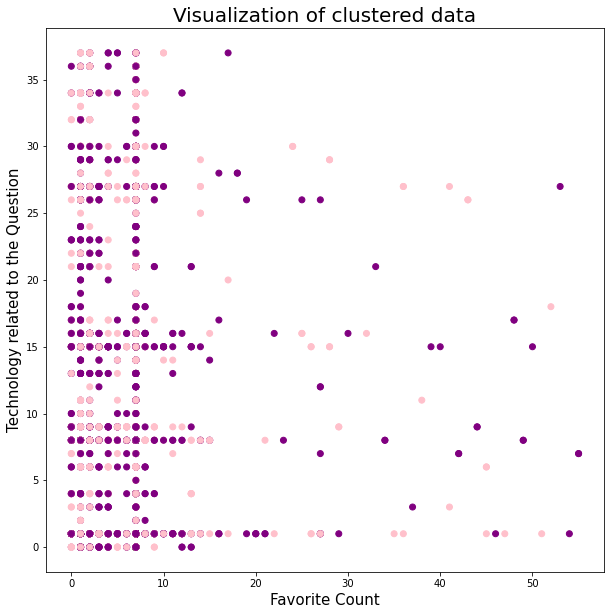

In [51]:
#Plot the clustered data 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Favorite Count', fontsize = 15)
ax.set_ylabel('Technology related to the Question', fontsize = 15)
ax.set_title('Visualization of clustered data', fontsize = 20)
color_theme = np.array(["purple","pink"])  

ax.scatter(x = X_train.iloc[:,5], y = X_train.iloc[:,10], color = color_theme[result.cluster], label = 'cluster 1')

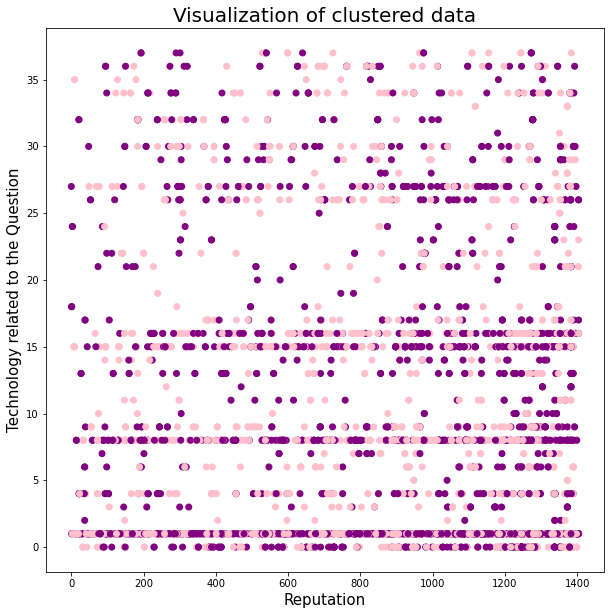

In [52]:
#Plot the clustered data 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Reputation', fontsize = 15)
ax.set_ylabel('Technology related to the Question', fontsize = 15)
ax.set_title('Visualization of clustered data', fontsize = 20)
color_theme = np.array(["purple","pink"])  

ax.scatter(x = X_train.iloc[:,7], y = X_train.iloc[:,10], color = color_theme[result.cluster], label = 'cluster 1')

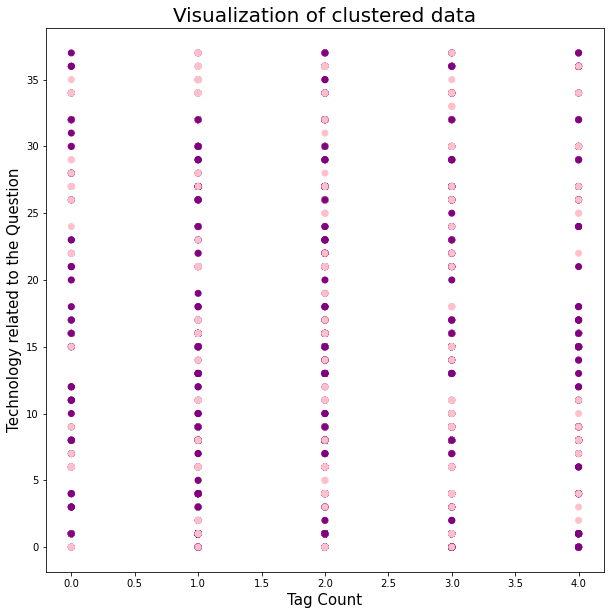

In [53]:
#Plot the clustered data 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Tag Count', fontsize = 15)
ax.set_ylabel('Technology related to the Question', fontsize = 15)
ax.set_title('Visualization of clustered data', fontsize = 20)
color_theme = np.array(["purple","pink"])  

ax.scatter(x = X_train.iloc[:,8], y = X_train.iloc[:,10], color = color_theme[result.cluster], label = 'cluster 1')

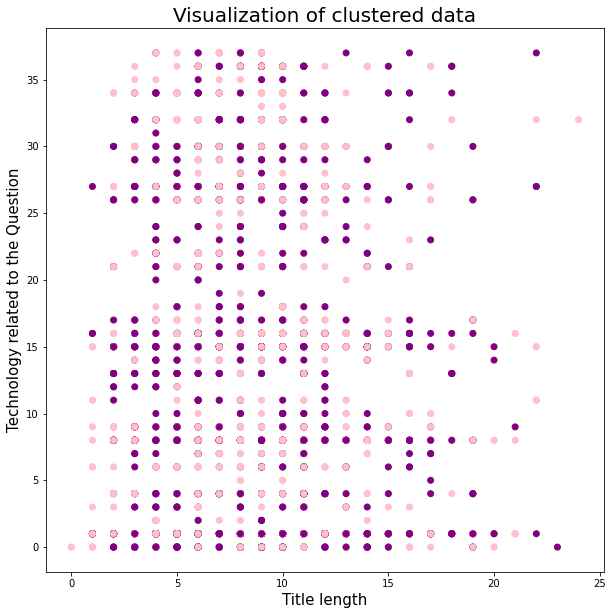

In [54]:
#Plot the clustered data 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Title length', fontsize = 15)
ax.set_ylabel('Technology related to the Question', fontsize = 15)
ax.set_title('Visualization of clustered data', fontsize = 20)
color_theme = np.array(["purple","pink"])  

ax.scatter(x = X_train.iloc[:,9], y = X_train.iloc[:,10], color = color_theme[result.cluster], label = 'cluster 1')

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

In [56]:
#The centroid of cluster
centroids=km.cluster_centers_
centroids=pd.DataFrame(centroids,columns=['Score',
 'CreationDate',
 'ViewCount',
 'AnswerCount',
 'CommentCount',
 'FavoriteCount',
 'AskerId',
 'Reputation',
 'TagCount',
 'TitleLength',
 'Technology'])
centroids

Score  CreationDate    ViewCount  AnswerCount  CommentCount  \
0  10.334292   1117.629158  1175.877207     2.780698      1.203696   
1   9.577760   3341.298147  1073.062450     2.468977      1.099919   

   FavoriteCount     AskerId  Reputation  TagCount  TitleLength  Technology  
0       5.393840  609.270226  881.868172  1.962218     7.997947    8.953183  
1       5.407736  612.774376  893.553586  1.958098     7.943997    8.783642

In [57]:
Train_Data_set['cluster']=km.labels_

In [58]:
Train_Data_set

Unnamed: 0  Score  CreationDate  ViewCount  AnswerCount  CommentCount  \
0           5319      8          1093       1631            1             0   
1           1799      6          2380         80            2             0   
2            532      5          3372       1223            3             0   
3           6042     10          3800        428            2             0   
4           1714      8          2565       1434            1             0   
...          ...    ...           ...        ...          ...           ...   
4912        5200     10          2404        954            1             0   
4913        4066     14          1161        853            3             8   
4914        3980      9          2296        679            1             1   
4915         931      7          2536        873            4             2   
4916        1984      7          1408       1828            4             0   

      FavoriteCount  AskerId  Reputation  TagCount  TitleLength  Technology  \
0                 1     1119         502         4           12           1   
1                 7      476         992         1           14          16   
2                 0      861         293         2            7           1   
3                 1     1091         845         1            5           1   
4                 7      447        1290         2           10          22   
...             ...      ...         ...       ...          ...         ...   
4912              7      791        1041         3            6          30   
4913              1      233         631         2            2           1   
4914              1      490        1381         3            9          27   
4915              1      338        1287         1            2           1   
4916              7      289        1155         0           10           1   

      cluster  
0           0  
1           1  
2           1  
3           1  
4           1  
...       ...  
4912        1  
4913        0  
4914        1  
4915        1  
4916        0  

[4917 rows x 13 columns]

In [59]:
pd.DataFrame(Train_Data_set).to_csv("clustered_data_set.csv")

In [60]:
Train_Data_set[Train_Data_set['cluster']== 0]

Unnamed: 0  Score  CreationDate  ViewCount  AnswerCount  CommentCount  \
0           5319      8          1093       1631            1             0   
6           5258      6           829        105            4             7   
8           1245      5           268       1540            1             0   
9           1730      7          1529       1272            6             2   
10          5994      1          1834        324            1             3   
...          ...    ...           ...        ...          ...           ...   
4909        1625      6           746       2060            3             0   
4910        4339      7          1508         85            3             2   
4911         321      9          1803       2551            5             0   
4913        4066     14          1161        853            3             8   
4916        1984      7          1408       1828            4             0   

      FavoriteCount  AskerId  Reputation  TagCount  TitleLength  Technology  \
0                 1     1119         502         4           12           1   
6                 7      385          74         3            4          21   
8                 7     1292         737         3            5          15   
9                 7      450        1373         1            2           4   
10                7      772         691         1            3          26   
...             ...      ...         ...       ...          ...         ...   
4909              7      919        1277         1            8          32   
4910              3      791        1041         3           16          16   
4911              7      290          21         0           12          32   
4913              1      233         631         2            2           1   
4916              7      289        1155         0           10           1   

      cluster  
0           0  
6           0  
8           0  
9           0  
10          0  
...       ...  
4909        0  
4910        0  
4911        0  
4913        0  
4916        0  

[2434 rows x 13 columns]

In [61]:
Train_Data_set[Train_Data_set['cluster']== 1]

Unnamed: 0  Score  CreationDate  ViewCount  AnswerCount  CommentCount  \
1           1799      6          2380         80            2             0   
2            532      5          3372       1223            3             0   
3           6042     10          3800        428            2             0   
4           1714      8          2565       1434            1             0   
5           5237      5          2927        483            1             0   
...          ...    ...           ...        ...          ...           ...   
4906        5356     10          2333       1779            1             0   
4907        4378     11          4024        928            1             0   
4912        5200     10          2404        954            1             0   
4914        3980      9          2296        679            1             1   
4915         931      7          2536        873            4             2   

      FavoriteCount  AskerId  Reputation  TagCount  TitleLength  Technology  \
1                 7      476         992         1           14          16   
2                 0      861         293         2            7           1   
3                 1     1091         845         1            5           1   
4                 7      447        1290         2           10          22   
5                 7      210         960         3            7          16   
...             ...      ...         ...       ...          ...         ...   
4906              1     1123        1048         3            1          15   
4907              1      258        1101         0            6           1   
4912              7      791        1041         3            6          30   
4914              1      490        1381         3            9          27   
4915              1      338        1287         1            2           1   

      cluster  
1           1  
2           1  
3           1  
4           1  
5           1  
...       ...  
4906        1  
4907        1  
4912        1  
4914        1  
4915        1  

[2483 rows x 13 columns]

In [62]:
Y_train = Train_Data_set['cluster']

In [63]:
Y_train

0       0
1       1
2       1
3       1
4       1
       ..
4912    1
4913    0
4914    1
4915    1
4916    0
Name: cluster, Length: 4917, dtype: int32

In [64]:
finalDf = pd.concat([principalDf, Train_Data_set[['cluster']]], axis = 1)

In [65]:
finalDf

principal_component_1  principal_component_2  cluster
0               1168.507105             436.312623        0
1               -183.979077           -1030.683994        1
2              -1123.934667             124.153964        1
3              -1588.459242            -641.190975        1
4               -313.483364             337.994435        1
...                     ...                    ...      ...
4912            -172.102885            -162.443690        1
4913            1068.883213            -314.741261        0
4914             -77.047766            -425.496674        1
4915            -307.862091            -221.105695        1
4916             860.089098             682.538438        0

[4917 rows x 3 columns]

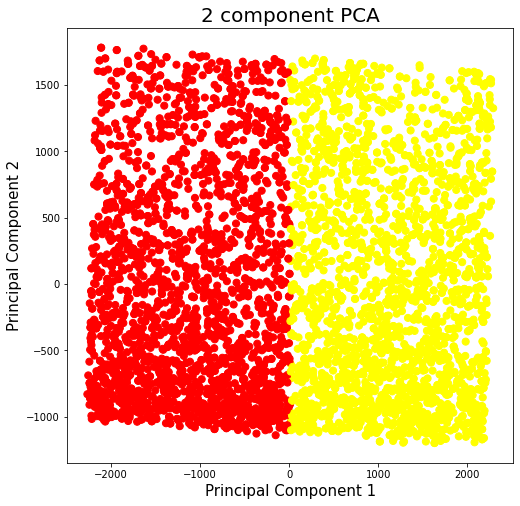

In [66]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

color_theme = np.array(["yellow","red"])
ax.scatter(x = finalDf.principal_component_1, y= finalDf.principal_component_2,
          color = color_theme[finalDf.cluster],s = 50)
plt.show()

In [67]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3.5, min_samples=2).fit(X_train)

In [68]:
from sklearn.manifold import TSNE
from scipy.stats import mode
from sklearn.metrics import accuracy_score

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(X_train)

# Compute the clusters
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(Y_train[mask])[0]

# Compute the accuracy
accuracy_score(Y_train, labels)

0.9489526133821435

In [69]:
#output the result to a text file

clusters = Train_Data_set.groupby('cluster')

for cluster in clusters.groups:
    f= open('cluster' +str(cluster)+ '.csv', 'w')#create csv file
    data = clusters.get_group(cluster)[['Score','CreationDate','ViewCount','AnswerCount','CommentCount','FavoriteCount',
    'AskerId','Reputation','TagCount','TitleLength','Technology']]#get title and overview columns
    f.write(data.to_csv(index_label='Id'))#set index to id
    f.close()

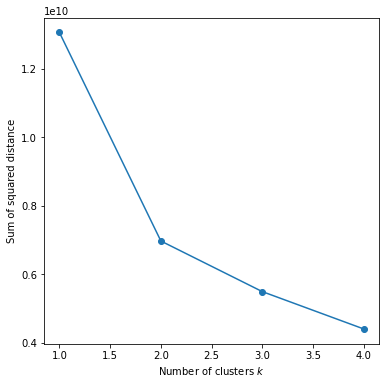

In [70]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 5))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_train)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters $k$')
plt.ylabel('Sum of squared distance');

In [71]:
%%time
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2).fit_predict(X_train)
print(silhouette_score(X_train, kmeans))

0.3850118260975122
Wall time: 670 ms


In [72]:
%%time
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3).fit_predict(X_train)
print(silhouette_score(X_train, kmeans))

0.3371345557347709
Wall time: 721 ms


In [73]:
%%time
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4).fit_predict(X_train)
print(silhouette_score(X_train, kmeans))

0.29608854986071986
Wall time: 759 ms


In [74]:
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 2 The average silhouette_score is :  0.3850118260975122
For n_clusters = 3 The average silhouette_score is :  0.3372767297524381
For n_clusters = 4 The average silhouette_score is :  0.2957377327289464


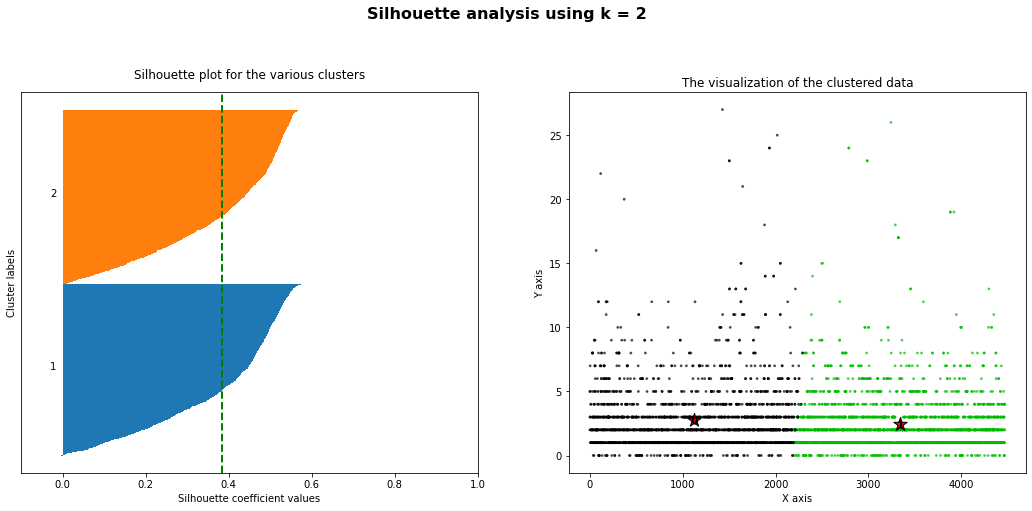

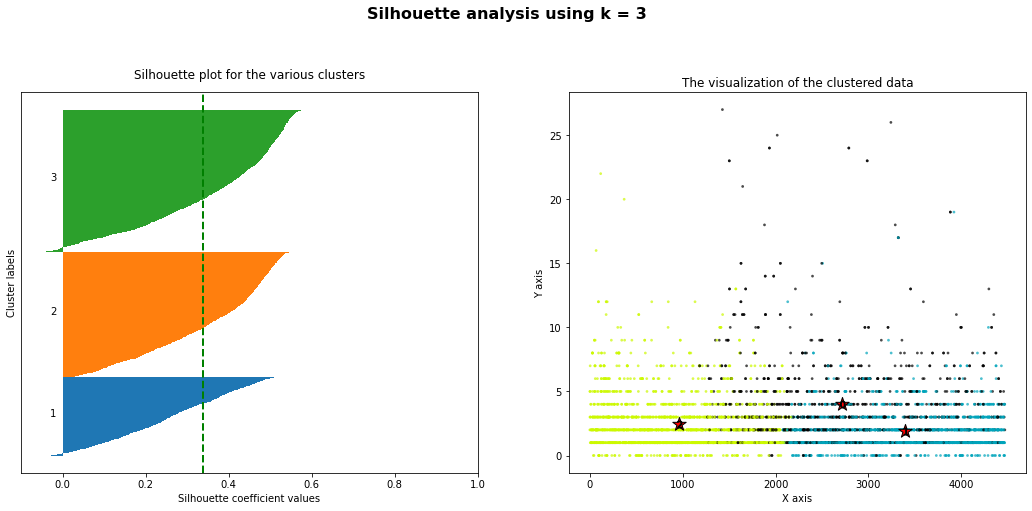

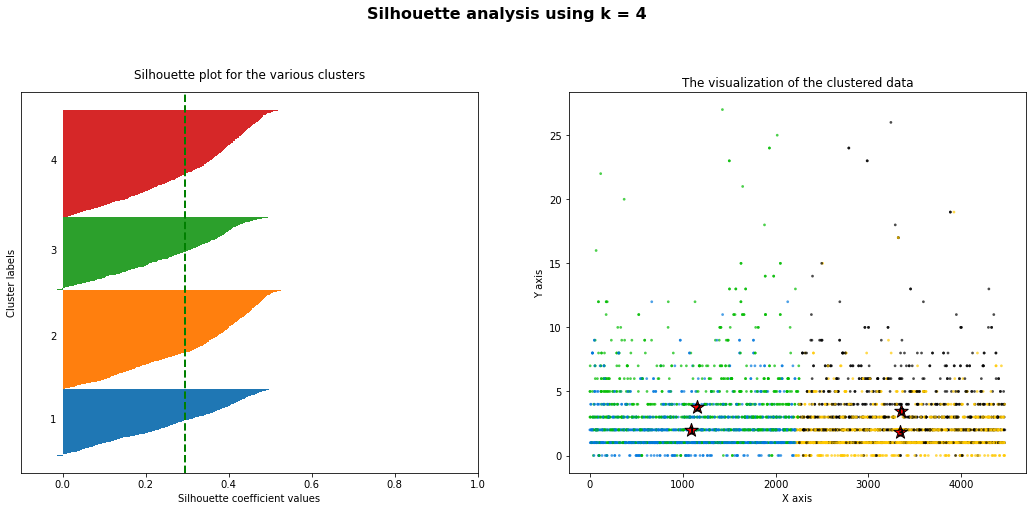

In [75]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_train)
    centroids = km.cluster_centers_
    
    #The silouette score gived the average value for all the samples.
    # This gives a perspective into the density and seperation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train, labels)
    print("For n_clusters =", k,
           "The average silhouette_score is : ", silhouette_avg)
    
    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_train, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    import matplotlib.cm as cm
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(labels.astype(float) / k)
    ax2.scatter(X_train.iloc[:, 1], X_train.iloc[:, 3], marker='.',c = colors , s=30, lw=0, alpha=0.7, edgecolor='k')
    
    
    
   #Draw the circles at cluster centers
    ax2.scatter(centroids[:,1],centroids[:,3],marker = '*', c = "red" , alpha = 1 , 
                s = 200 , edgecolor = 'k')
    
    for i,c in enumerate (centroids):
        #ax2.scatter(X_train.values[:, 7], X_train.values[:, 3], c=km.labels_)
        #ax2.scatter(X_train.iloc[:,0],X_train.iloc[:,1],a ='cluster',c='yellow', label = 'cluster 2')
        ax2.scatter(c[1],c[3],marker='$%d$' %i,
                   alpha = 1, s = 50 , edgecolor = 'k')
        ax2.set_title("The visualization of the clustered data")
        ax2.set_xlabel("X axis")
        ax2.set_ylabel("Y axis")
        plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);
plt.show()

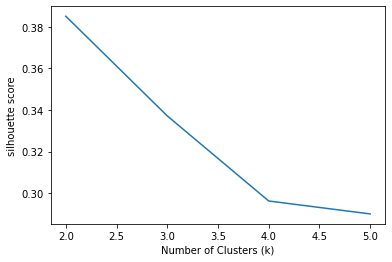

In [76]:
range_n_clusters = [2, 3, 4,5]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    km.labels_ = clusterer.fit_predict(X_train)

    silhouette_avg = silhouette_score(X_train, km.labels_)

    silhouette_avg_n_clusters.append(silhouette_avg)

    
#style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

In [102]:
km = KMeans(n_clusters=2)
Test_Data_set['clusters'] = km.fit_predict(Test_Data_set)

In [103]:
Y_test = Test_Data_set['clusters']

In [104]:
Y_test

0       1
1       1
2       0
3       0
4       0
       ..
1225    0
1226    1
1227    1
1228    0
1229    0
Name: clusters, Length: 1230, dtype: int32

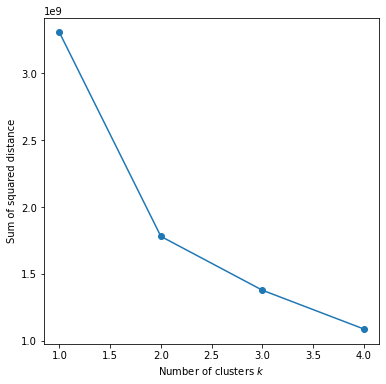

In [80]:
# Run the Kmeans algorithm on test data set
sse = []
list_k = list(range(1, 5))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_test)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters $k$')
plt.ylabel('Sum of squared distance');

In [81]:
%%time
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2).fit_predict(X_test)
print(silhouette_score(X_test, kmeans))

0.38273359354764336
Wall time: 101 ms


In [82]:
%%time
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3).fit_predict(X_test)
print(silhouette_score(X_test, kmeans))

0.34058539979592506
Wall time: 145 ms


In [83]:
%%time
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4).fit_predict(X_test)
print(silhouette_score(X_test, kmeans))

0.31403962265451923
Wall time: 162 ms


For n_clusters = 2 The average silhouette_score is :  0.38273359354764336
For n_clusters = 3 The average silhouette_score is :  0.34058539979592506
For n_clusters = 4 The average silhouette_score is :  0.31403962265451923


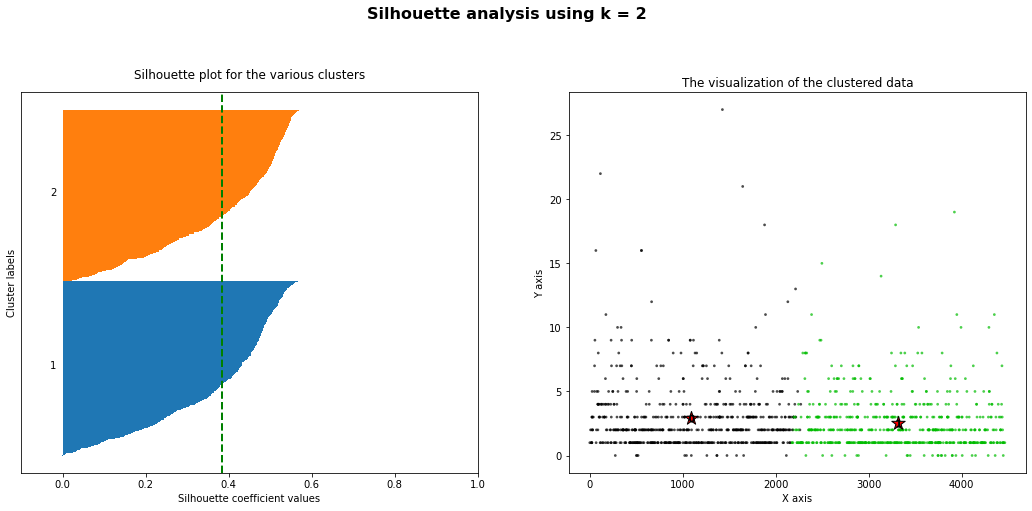

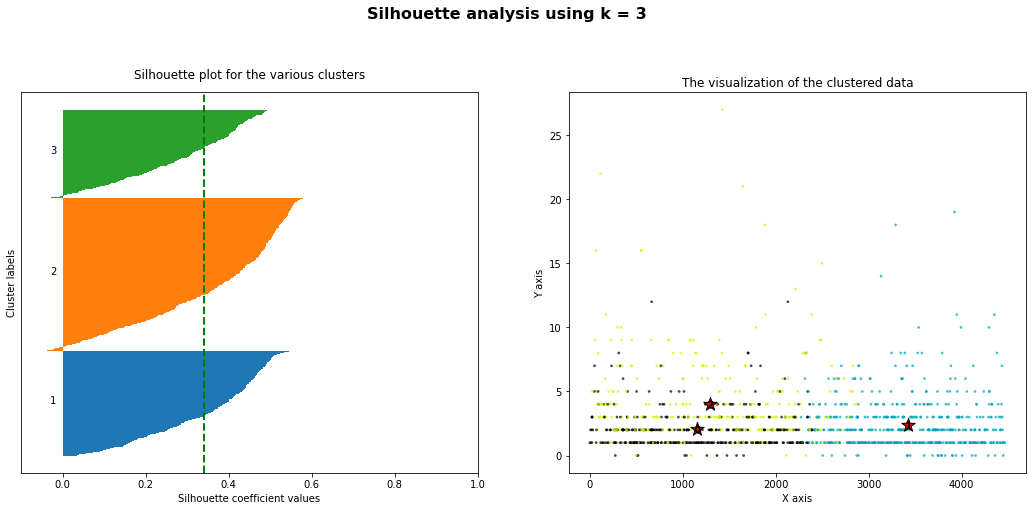

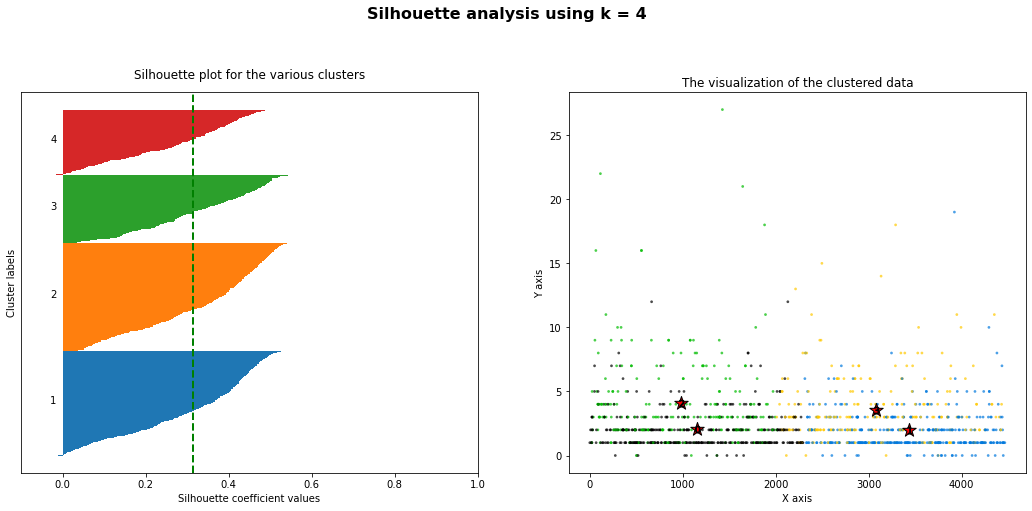

In [84]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_test)
    centroids = km.cluster_centers_
    
    #The silouette score gived the average value for all the samples.
    # This gives a perspective into the density and seperation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_test, labels)
    print("For n_clusters =", k,
           "The average silhouette_score is : ", silhouette_avg)
    
    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_test, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    import matplotlib.cm as cm
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(labels.astype(float) / k)
    ax2.scatter(X_test.iloc[:, 1], X_test.iloc[:, 3], marker='.',c = colors , s=30, lw=0, alpha=0.7, edgecolor='k')
    
    
    
   #Draw the circles at cluster centers
    ax2.scatter(centroids[:,1],centroids[:,3],marker = '*', c = "red" , alpha = 1 , 
                s = 200 , edgecolor = 'k')
    
    for i,c in enumerate (centroids):
        #ax2.scatter(X_train.values[:, 7], X_train.values[:, 3], c=km.labels_)
        #ax2.scatter(X_train.iloc[:,0],X_train.iloc[:,1],a ='cluster',c='yellow', label = 'cluster 2')
        ax2.scatter(c[1],c[3],marker='$%d$' %i,
                   alpha = 1, s = 50 , edgecolor = 'k')
        ax2.set_title("The visualization of the clustered data")
        ax2.set_xlabel("X axis")
        ax2.set_ylabel("Y axis")
        plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);
plt.show()

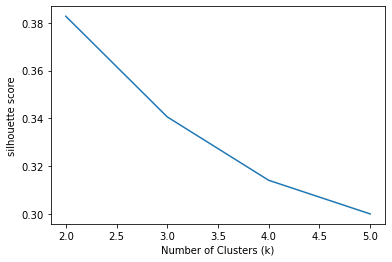

In [85]:
range_n_clusters = [2, 3, 4,5]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    km.labels_ = clusterer.fit_predict(X_test)

    silhouette_avg = silhouette_score(X_test, km.labels_)

    silhouette_avg_n_clusters.append(silhouette_avg)

    
#style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

In [118]:
Questions = pd.read_csv("Prediction_set - Copy.csv")
clustering_kmeans = KMeans(n_clusters=2)
Questions['clusters'] = clustering_kmeans.fit_predict(Questions)
clusters = Questions['clusters']
clusters

0    0
1    1
Name: clusters, dtype: int32